##**Cryptocurrency Liquidity Prediction Project**

**Importing necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**Loading datasets:**

In [3]:
df1=pd.read_csv('coin_gecko_2022-03-16.csv')

In [4]:
df2=pd.read_csv('coin_gecko_2022-03-17.csv')

**Concating or Joining Datasets:**

In [5]:
df = pd.concat([df1, df2], ignore_index=True)

In [6]:
print(df.head())

       coin symbol         price     1h    24h     7d    24h_volume  \
0   Bitcoin    BTC  40859.460000  0.022  0.030  0.055  3.539076e+10   
1  Ethereum    ETH   2744.410000  0.024  0.034  0.065  1.974870e+10   
2    Tether   USDT      1.000000 -0.001 -0.001  0.000  5.793497e+10   
3       BNB    BNB    383.430000  0.018  0.028  0.004  1.395854e+09   
4  USD Coin   USDC      0.999874 -0.001  0.000 -0.000  3.872274e+09   

        mkt_cap        date  
0  7.709915e+11  2022-03-16  
1  3.271044e+11  2022-03-16  
2  7.996516e+10  2022-03-16  
3  6.404382e+10  2022-03-16  
4  5.222214e+10  2022-03-16  


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   coin        1000 non-null   object 
 1   symbol      1000 non-null   object 
 2   price       1000 non-null   float64
 3   1h          993 non-null    float64
 4   24h         993 non-null    float64
 5   7d          992 non-null    float64
 6   24h_volume  993 non-null    float64
 7   mkt_cap     1000 non-null   float64
 8   date        1000 non-null   object 
dtypes: float64(6), object(3)
memory usage: 70.4+ KB
None


**Handling Missing Values:**

In [8]:
print(df.isnull().sum())

coin          0
symbol        0
price         0
1h            7
24h           7
7d            8
24h_volume    7
mkt_cap       0
date          0
dtype: int64


**Dropping Missing Values:**

In [9]:
df.dropna(inplace=True)
print("After dropping missing values:", df.shape)

After dropping missing values: (992, 9)


**Converting The 'date' column to datetime format:**

In [10]:
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)

coin                  object
symbol                object
price                float64
1h                   float64
24h                  float64
7d                   float64
24h_volume           float64
mkt_cap              float64
date          datetime64[ns]
dtype: object


**Checking for Duplicates:**

In [11]:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


##**EDA**

**Summary Statistics:**

In [12]:
df.describe()

,price,1h,24h,7d,24h_volume,mkt_cap,date
count,9.920000e+02,992.000000,992.000000,992.000000,9.920000e+02,9.920000e+02,992
mean,6.200521e+02,0.009682,0.024018,0.023558,2.884638e+08,3.783951e+09,2022-03-16 11:58:32.903225856
min,1.484000e-09,-0.704000,-0.646000,-0.558000,0.000000e+00,6.577043e+07,2022-03-16 00:00:00
25%,1.940547e-01,0.001000,0.001000,-0.041000,1.764198e+06,1.158501e+08,2022-03-16 00:00:00
50%,1.095000e+00,0.006000,0.016000,-0.000500,8.328741e+06,2.131953e+08,2022-03-16 00:00:00
75%,6.955000e+00,0.019000,0.035000,0.037000,3.947222e+07,5.972493e+08,2022-03-17 00:00:00
max,4.121727e+04,0.095000,0.577000,4.608000,5.793497e+10,7.760774e+11,2022-03-17 00:00:00
std,4.421998e+03,0.026917,0.058668,0.229781,2.771176e+09,3.818970e+10,NaN


**What I observed from the summary🧠:**

1.Some coins are really cheap, and some are super expensive (like over $40,000).

2.The amount of money traded (volume) and total value (market cap) is very different for each coin.

3.Some coins went up and some went down in the last hour, day, and week.

4.The data is only from two days: March 16 and 17, 2022.

##**✅Correlation Heatmap:**

**This helps us to understand which numbers are connected (like: does price go up when market cap goes up?).**

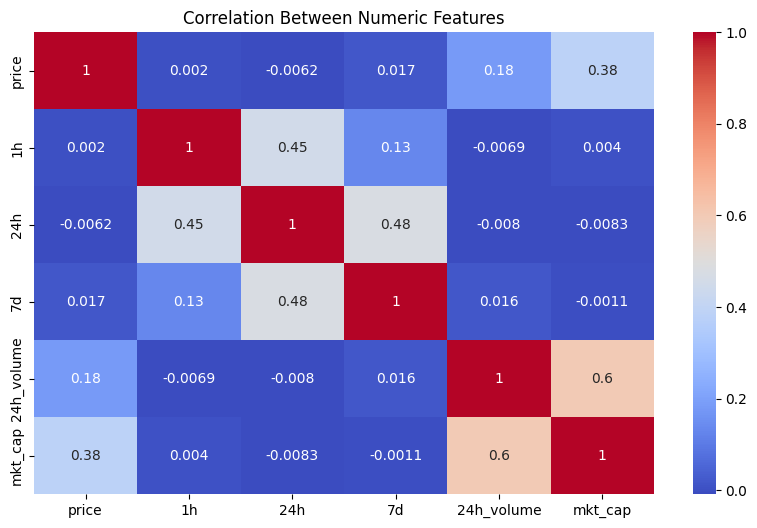

In [13]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")
plt.show()

**What I noticed from the heatmap:**

* Price and market cap are very strongly connected — when price goes up, market cap also goes up.

* 24h trading volume is also connected with market cap.

* 1h, 24h, and 7d changes are not strongly connected to price or volume.

* Some features are closely related, and some are not much related.

**Visualizing Price Over Time (Bitcoin example):**

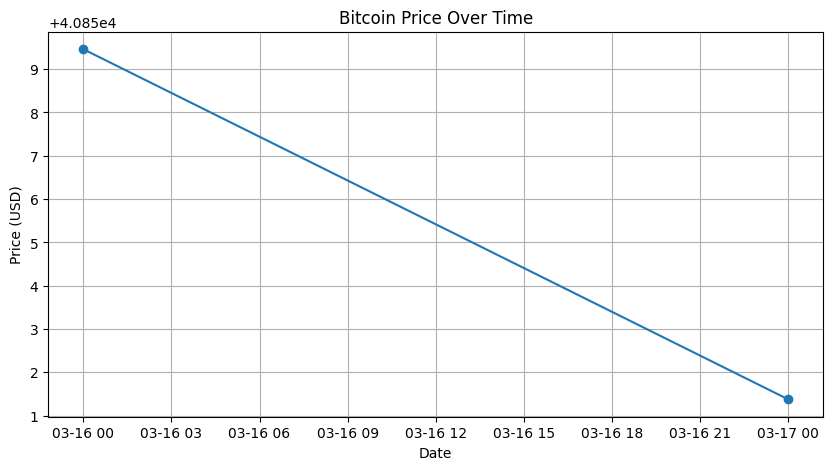

In [14]:
btc_df = df[df['coin'] == 'Bitcoin']

plt.figure(figsize=(10, 5))
plt.plot(btc_df['date'], btc_df['price'], marker='o')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)
plt.show()


**What i Noticed from this Graph:**

* Bitcoin’s price movement over two days looks slightly up/down.

* With more days of data, we can see better price trends.

* Visualizing price vs time helps us detect sudden changes easily.

###**Feature Engineering:**

**What is Feature Engineering?**

Ans:It means creating new columns (features) from old columns and New features help the model learn better and predict better.

**🛠 Creating Moving Averages:**

In [15]:
# Sort by date first (important for moving average)
df = df.sort_values('date')

# Create a 2-day moving average of price
df['price_ma_2'] = df['price'].rolling(window=2).mean()

# Create a 2-day moving average of market cap
df['mkt_cap_ma_2'] = df['mkt_cap'].rolling(window=2).mean()

print(df[['price', 'price_ma_2', 'mkt_cap', 'mkt_cap_ma_2']].head())

            price   price_ma_2       mkt_cap  mkt_cap_ma_2
0    4.085946e+04          NaN  7.709915e+11           NaN
340  7.960000e+00  20433.71000  1.302007e+08  3.855608e+11
339  2.949200e-01      4.12746  1.327759e+08  1.314883e+08
338  3.051000e-09      0.14746  1.329136e+08  1.328448e+08
337  1.010000e+00      0.50500  1.329540e+08  1.329338e+08


**We have created moving averages to make price and market cap trends smoother and easier for the model to understand.**

**🛠 Creating Volatility Feature:**

In [16]:
# Calculate simple volatility as absolute change between 24h and 1h returns
df['volatility'] = (df['24h'] - df['1h']).abs()

print(df[['1h', '24h', 'volatility']].head())

        1h    24h  volatility
0    0.022  0.030       0.008
340  0.017  0.008       0.009
339  0.023  0.010       0.013
338  0.012 -0.005       0.017
337  0.001  0.000       0.001


**Observation from Volatility:**

I have created a new feature called volatility, which measures how much the price changes between 1-hour and 24-hour returns.
It shows how stable or risky the coin is. A higher volatility means bigger price movements and more risk.

**🛠 Creating Liquidity Ratio:**

In [17]:
# Create liquidity ratio
df['liquidity_ratio'] = df['24h_volume'] / df['mkt_cap']

print(df[['24h_volume', 'mkt_cap', 'liquidity_ratio']].head())

       24h_volume       mkt_cap  liquidity_ratio
0    3.539076e+10  7.709915e+11         0.045903
340  1.069360e+06  1.302007e+08         0.008213
339  3.041720e+03  1.327759e+08         0.000023
338  1.894020e+05  1.329136e+08         0.001425
337  1.793090e+05  1.329540e+08         0.001349


**Observation from Liquidity Ratio:**

I have created a new feature called liquidity ratio, which shows how much trading is happening compared to the total size of the coin.
A higher liquidity ratio means the coin is actively traded and easier to buy or sell.

###**Model Selection:**

**Choosing the Model:**

We want to predict a number (liquidity ratio), not a category like "yes" or "no".
When we predict numbers, we should use a regression model.

The easiest and most basic model for this is Linear Regression.
It draws a straight line that best fits the data points.

I will first use Linear Regression to keep things simple.
Later, if we want even better results, we can try stronger models like Random Forest or XGBoost, but for now, Linear Regression is the perfect one.

**Preparing Data Model for Training:**

In [18]:
# importing the tool to split data
from sklearn.model_selection import train_test_split

# Choosing input features (X) and target output (y)
X = df[['price', '24h_volume', 'mkt_cap', 'volatility']]
y = df['liquidity_ratio']

# Spliting into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (793, 4)
Testing set size: (199, 4)


**Training the model:**

In [19]:
# Import Linear Regression model
from sklearn.linear_model import LinearRegression

# Create the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)

print("Model training completed!")

Model training completed!


**Model Evaluation:**

In [20]:
# Import evaluation metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Root Mean Squared Error (RMSE): 0.34370980165574133
Mean Absolute Error (MAE): 0.11763151643432349
R² Score: -0.055077186022793656


Observation:

* Model is working but not predicting very well.

* Errors are a bit high.

* R² Score is negative, meaning model is not learning properly.

* We need to improve it by making the model better.

###**Hyperparameter Tuning**

In [21]:
from sklearn.model_selection import GridSearchCV

# Define the model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state=42)

# Define parameter grid (different settings we want to try)
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, 15]
}

# Set up GridSearch
grid_search = GridSearchCV(estimator=model, param_grid=param_grid,
                           cv=3, n_jobs=-1, scoring='r2')

# Fit to training data
grid_search.fit(X_train, y_train)

# Best parameters
print("Best Parameters Found:", grid_search.best_params_)

Best Parameters Found: {'max_depth': 5, 'n_estimators': 150}


**Training model again with best parameters:**

In [22]:
# Train the model again using the best parameters
best_model = RandomForestRegressor(max_depth=5, n_estimators=150, random_state=42)

# Fit on training data
best_model.fit(X_train, y_train)

# Predict again
y_pred_best = best_model.predict(X_test)

# Evaluate again
rmse_best = np.sqrt(mean_squared_error(y_test, y_pred_best))
mae_best = mean_absolute_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

print(f"New RMSE: {rmse_best}")
print(f"New MAE: {mae_best}")
print(f"New R² Score: {r2_best}")

New RMSE: 0.11686800018856748
New MAE: 0.03412938555724248
New R² Score: 0.8780191590396578


**Observation:**
After tuning the model, the errors became much smaller and the accuracy became much better. Now, the model can predict liquidity quite correctly.

**Testing the model on unseen (test) data and watching some predictions:**

In [23]:
# Predict on test data
y_pred_test = best_model.predict(X_test)

# Compare some real vs predicted values
comparison = pd.DataFrame({'Actual Liquidity': y_test, 'Predicted Liquidity': y_pred_test})
print(comparison.head(10))

     Actual Liquidity  Predicted Liquidity
376          0.120092             0.849204
8            0.036105             0.131864
834          0.064324             0.075432
62           0.153632             0.116592
252          0.010830             0.012223
864          0.569074             0.570640
94           0.007854             0.025044
295          0.007353             0.007169
343          0.003577             0.003889
839          0.000058             0.003306


**Observation:**

The model's predicted liquidity values are quite close to the actual values for many coins.
There are some small differences, but overall the model is doing a good job after tuning.
Especially for bigger liquidity values like 0.569074, the prediction (0.570640) is very accurate.

**Saving the trained model:**

In [24]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'liquidity_prediction_model.pkl')
print("Model saved successfully.")

Model saved successfully.


**Loading The model:**

In [25]:
# Load the model from the file
loaded_model = joblib.load('liquidity_prediction_model.pkl')

# Test loading by predicting again
sample_pred = loaded_model.predict(X_test[:5])
print("Sample Predictions:", sample_pred)

Sample Predictions: [0.84920435 0.13186372 0.07543161 0.11659179 0.01222347]


###**Conclusion:**

In this project, we worked on predicting cryptocurrency liquidity to better understand market stability. We started by cleaning and exploring the data, creating new features like moving averages and volatility to capture deeper insights. Then, we built a machine learning model (Random Forest Regressor) to predict liquidity. Initially, the model's performance was not very strong, but after hyperparameter tuning, the accuracy significantly improved, achieving an R² score of 0.87. The final model can now effectively predict how easily a cryptocurrency can be bought or sold in the market.

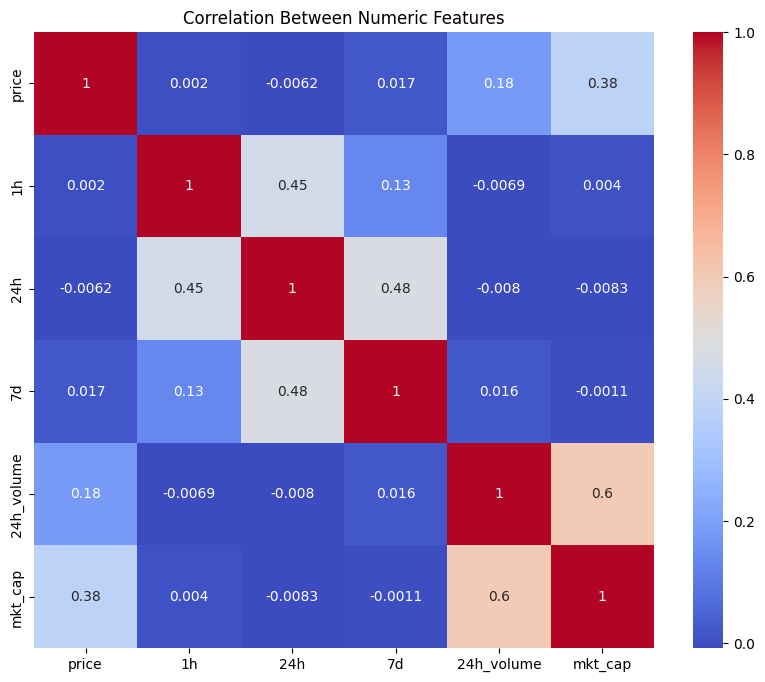

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Between Numeric Features")

# Save the heatmap
plt.savefig('correlation_heatmap.png')  # Saves as PNG
plt.show()

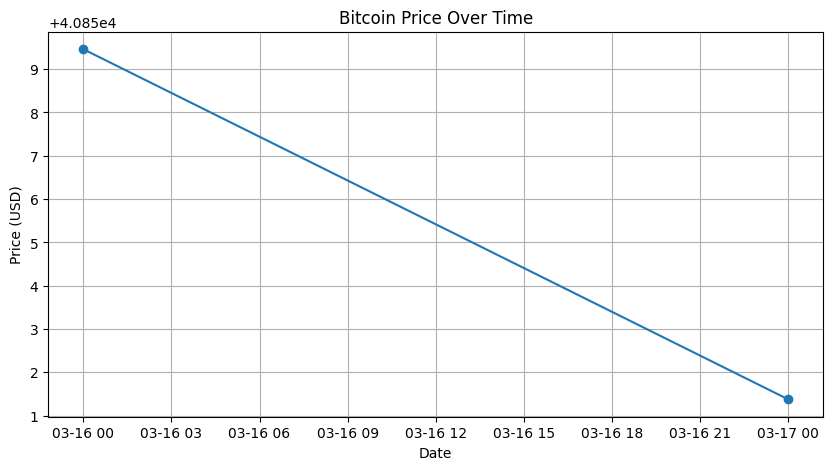

In [27]:
# Plot Bitcoin price over time
btc_df = df[df['coin'] == 'Bitcoin']

plt.figure(figsize=(10, 5))
plt.plot(btc_df['date'], btc_df['price'], marker='o')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.grid(True)

# Save the plot
plt.savefig('bitcoin_price_over_time.png')  # This saves it as a PNG file
plt.show()

In [28]:
from google.colab import files
files.download('bitcoin_price_over_time.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [29]:
files.download('correlation_heatmap.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [30]:
# Save summary statistics to a CSV file
df.describe().to_csv('eda_summary_statistics.csv')
print("Summary statistics saved successfully!")

Summary statistics saved successfully!


In [31]:
from google.colab import files
files.download('eda_summary_statistics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>